# **Projet optimisation stochastique : Fonction de Rosenbrock**









>











# I- Introduction

L'optimisation stochastique, une branche dynamique de l'optimisation, s'est avérée importante pour résoudre des problèmes complexes et non déterministes, où les paramètres évoluent de manière incertaine ou aléatoire.

L'étude de fonctions objets dans ce contexte permet de développer des algorithmes capables de trouver des solutions robustes et performantes.

Dans le cadre de ce projet, nous nous penchons sur la fonction de Rosenbrock, une fonction d'optimisation classique et emblématique, afin d'explorer les défis qu'elle pose et de comparer les approches stochastiques pour son optimisation.

## Qu'est ce que la fonction de Rosenbrock ?

La fonction de Rosenbrock, également désignée sous les termes de "vallée de Rosenbrock" ou "fonction de Rosenbrock's valley", est fréquemment utilisée comme référence pour évaluer les performances d'algorithmes d'optimisation. Mathématiquement définie comme suit :
  
  
  **f(x, y) = (a - x)² + b * (y - x²)²**

où a et b sont des constantes positives, la fonction de Rosenbrock se caractérise par une forme allongée et étroite, créant ainsi une vallée profonde et étroite. La quête du minimum global de cette fonction est un défi en raison de l'existence d'une trajectoire plate prolongée conduisant au minimum global.

## Pourquoi l'optimisation déterministe échoue-t-elle dans la découverte du minimum global de cette fonction ?


L'optimisation déterministe est traditionnellement employée pour résoudre des problèmes dont les paramètres sont constants dans le temps.

Cependant, face à la fonction de Rosenbrock, caractérisée par une vallée étroite, les méthodes déterministes se voient confrontées à des difficultés pour traverser efficacement la surface complexe de la fonction en vue d'atteindre le minimum global. Souvent piégées dans des minima locaux, ces méthodes échouent à identifier la solution optimale.

C'est ici qu'intervient le rôle de l'optimisation stochastique s'adapte particulièrement bien à l'exploration d'espaces de recherche complexes, surtout en présence d'incertitudes ou de variations aléatoires. Des algorithmes tels que le recuit simulé tirent parti du caractère probabiliste pour explorer de manière plus exhaustive l'espace des solutions, augmentant ainsi les chances de découvrir le minimum global.

# II- La Fonction Rosenbrock et son minimum

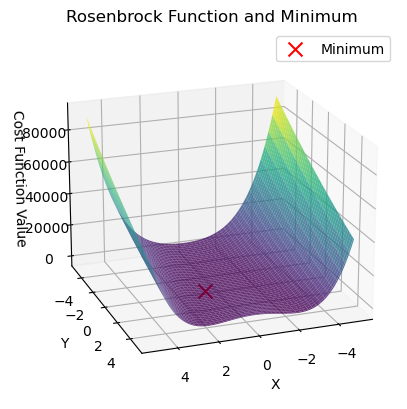

In [131]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Generate data for 3D plotting
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

# Plot the Rosenbrock function in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Plot the minimum
resultat = [1, 1,  0]
ax.scatter(resultat[0], resultat[1], resultat[2], color='red', marker='x', s=100, label='Minimum')

# Set the view angle for rotation
ax.view_init(elev=20, azim=70)  # Adjust the elevation (elev) and azimuth (azim) angles

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Cost Function Value')
ax.set_title('Rosenbrock Function and Minimum')

# Show the plot
plt.legend()
plt.show()

Décorateur pour un calcul rapide du temps d'exécution

In [66]:
import time

def calculate_execution_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Execution time: {execution_time} seconds")
        return result
    return wrapper

# III- Algorithme de recuit simulé pour minimiser la fonction de Rosenbrock

## Algorithme 

**Initialisation :**
- Définir la fonction de Rosenbrock.
- Initialiser l'état courant : x_courant, y_courant avec des valeurs aléatoires dans un intervalle approprié.
- Initialiser la température initiale, la température minimale, le taux de refroidissement, et le nombre d'itérations par température.

**Boucle principale :**
- Tant que la température est supérieure à la température minimale :
    - Pour un nombre d'itérations défini par température :
        - Générer un voisin aléatoire (perturbation).
        - Calculer la valeur du voisin.
        - Calculer la différence de coût (delta_cout) entre le voisin et l'état courant.
        - Accepter le voisin avec une certaine probabilité basée sur la différence de coût et la température.
        - Mettre à jour l'état courant si le voisin est accepté.

    - Refroidir la température en la multipliant par le taux de refroidissement.

**Résultat :**
- Afficher le minimum trouvé à la fin de l'algorithme : 
    x = x_courant, y = y_courant, Valeur = rosenbrock(x_courant, y_courant)


**Données utilisées pour l'implémentation :**

*   Température initiale = 1000  
*   Température minimale = 0.1  
*   Taux de refroidissement = 0.99

In [71]:
import math
import random

# Fonction de Rosenbrock
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Algorithme de recuit simulé
@calculate_execution_time
def recuit_simule(temperature_initiale, temperature_minimale, taux_refroidissement, iterations_par_temperature):

    # Initialisation de l'état courant
    x_courant = random.uniform(-5, 5)
    y_courant = random.uniform(-5, 5)
    valeur_courante = rosenbrock(x_courant, y_courant)

    # Boucle principale
    temperature = temperature_initiale
    while temperature > temperature_minimale:
        for _ in range(iterations_par_temperature):
            # Générer un voisin aléatoire
            x_voisin = x_courant + random.uniform(-0.1, 0.1)
            y_voisin = y_courant + random.uniform(-0.1, 0.1)

            # Calculer la valeur du voisin
            valeur_voisin = rosenbrock(x_voisin, y_voisin)

            # Calculer la différence de coût
            delta_cout = valeur_voisin - valeur_courante

            # Accepter le voisin avec une certaine probabilité
            if delta_cout < 0 or random.uniform(0, 1) < math.exp(-delta_cout / temperature):
                x_courant, y_courant = x_voisin, y_voisin
                valeur_courante = valeur_voisin

        # Refroidir la température
        temperature *= taux_refroidissement

    # Résultat final
    return x_courant, y_courant, valeur_courante

# Exécution de l'algorithme
resultat = recuit_simule(1000, 0.1, 0.99 ,1000)
print("Minimum trouvé à x =", resultat[0], "y =", resultat[1], "avec une valeur de", resultat[2])


Execution time: 2.0488393306732178 seconds
Minimum trouvé à x = 0.8123883531840624 y = 0.616179320920431 avec une valeur de 0.22700284753774347



# IV- Algorithme de la descente du gradient pour minimiser la fonction de Rosenbrock

## Algorithme :

**Initialisation :**
- Définir la fonction de Rosenbrock.
- Définir le gradient de la fonction de Rosenbrock.
- Initialiser les paramètres : x_current, y_current avec des valeurs aléatoires dans un intervalle approprié.

**Boucle principale (itérations) :**
- Pour chaque itération :
    - Calculer le gradient de la fonction de Rosenbrock au point actuel (x_current, y_current).
    - Mettre à jour les paramètres selon la règle de la descente du gradient : 
        x_current \leftarrow x_current - learning_rate * gradient[0]
        y_current \leftarrow y_current - learning_rate * gradient[1]
    - Afficher la progression (optionnel).

**Résultat :**
- Afficher le minimum trouvé à la fin de l'algorithme : 
    x = x_current, y = y_current, Valeur = rosenbrock(x_current, y_current)


## Code :

In [55]:
import numpy as np

# Fonction de Rosenbrock
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Gradient de la fonction de Rosenbrock
def gradient_rosenbrock(x, y):
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

# Descente de gradient stochastique
@calculate_execution_time
def stochastic_gradient_descent(learning_rate, iterations):
    # Initialisation des paramètres
    x_current, y_current = np.random.uniform(-5, 5, 2)

    for iteration in range(iterations):
        # Calcul du gradient
        gradient = gradient_rosenbrock(x_current, y_current)

        # Mise à jour des paramètres
        x_current -= learning_rate * gradient[0]
        y_current -= learning_rate * gradient[1]

        # Affichage de la progression
        if iteration % 100 == 0:
            cost = rosenbrock(x_current, y_current)
            print(f"Iteration {iteration}: x = {x_current:.4f}, y = {y_current:.4f}, Cost = {cost:.4f}")

    # Résultat final
    return x_current, y_current, rosenbrock(x_current, y_current)

# Paramètres d'apprentissage
learning_rate = 0.0001  
iterations = 1000  # Augmentez le nombre d'itérations

# Exécution de la descente de gradient stochastique
resultat = stochastic_gradient_descent(learning_rate, iterations)
print("Minimum trouvé à x =", resultat[0], "y =", resultat[1], "avec une valeur de", resultat[2])


Iteration 0: x = -0.5612, y = -3.4064, Cost = 1387.2773
Iteration 100: x = 0.0052, y = -0.4481, Cost = 21.0734
Iteration 200: x = 0.0179, y = -0.0593, Cost = 1.3196
Iteration 300: x = 0.0349, y = -0.0071, Cost = 0.9383
Iteration 400: x = 0.0534, y = 0.0010, Cost = 0.8964
Iteration 500: x = 0.0718, y = 0.0039, Cost = 0.8618
Iteration 600: x = 0.0897, y = 0.0066, Cost = 0.8288
Iteration 700: x = 0.1071, y = 0.0098, Cost = 0.7975
Iteration 800: x = 0.1240, y = 0.0134, Cost = 0.7678
Iteration 900: x = 0.1402, y = 0.0175, Cost = 0.7396
Execution time: 0.00450444221496582 seconds
Minimum trouvé à x = 0.15580263031674058 y = 0.021950437715819865 avec une valeur de 0.7132093067582769


# V- Algorithme génétique simulé pour minimiser la fonction de Rosenbrock


## Algorithme :

1. **Initialisation :**
   - Définir la fonction de Rosenbrock.
   - Initialiser la population avec des individus générés aléatoirement.

2. **Boucle principale (générations) :**
   - Pour chaque génération :
      - Évaluer la fitness de chaque individu dans la population en utilisant la fonction objectif (la fonction de Rosenbrock dans ce cas).
      - Sélectionner les parents en fonction de leur fitness.
      - Appliquer la crossover (mélange des parents) pour créer des individus "enfants".
      - Appliquer la mutation aux individus enfants.
      - Remplacer les individus les moins adaptés de la population par les individus enfants.
      - Répéter le processus pour un certain nombre de générations.

3. **Résultats :**
   - Afficher le meilleur individu trouvé et sa valeur de fitness (solution optimale).


## Code :

In [64]:
import numpy as np

# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Define the objective function for the genetic algorithm
def objective_function(individual):
    x, y = individual
    return rosenbrock(x, y)

# Genetic Algorithm function
@calculate_execution_time
def genetic_algorithm(population_size, num_generations, mutation_rate):
    # Initialize population
    population = np.random.uniform(low=-2, high=2, size=(population_size, 2))

    for generation in range(num_generations):
        # Evaluate fitness of each individual in the population
        fitness = np.apply_along_axis(objective_function, 1, population)

        # Select parents based on fitness
        parents = population[np.argsort(fitness)[:2]]

        # Crossover (blend parents)
        offspring = (parents[0] + parents[1]) / 2.0

        # Mutation
        mutation = np.random.uniform(low=-mutation_rate, high=mutation_rate, size=offspring.shape)
        offspring += mutation

        # Replace the least fit individual in the population with the offspring
        worst_index = np.argmax(fitness)
        population[worst_index] = offspring

        # Print the best individual and its fitness in the current generation
        best_index = np.argmin(fitness)
        print(f"Generation {generation+1}: Best Fitness = {fitness[best_index]}, Best Individual = {population[best_index]}")

    # Return the best individual found
    best_index = np.argmin(fitness)
    return population[best_index]

# Set parameters
population_size = 10
num_generations = 100
mutation_rate = 0.3

# Run the genetic algorithm
best_individual = genetic_algorithm(population_size, num_generations, mutation_rate)

print("\nOptimal Solution:")
print("x :", best_individual[0], "y :", best_individual[1],"Valeur:", objective_function(best_individual))


Generation 1: Best Fitness = 56.813029036491905, Best Individual = [-0.7492607   1.29455676]
Generation 2: Best Fitness = 2.496345784071407, Best Individual = [-0.42290384  0.11016794]
Generation 3: Best Fitness = 2.496345784071407, Best Individual = [-0.42290384  0.11016794]
Generation 4: Best Fitness = 2.496345784071407, Best Individual = [-0.42290384  0.11016794]
Generation 5: Best Fitness = 2.496345784071407, Best Individual = [-0.42290384  0.11016794]
Generation 6: Best Fitness = 2.496345784071407, Best Individual = [-0.42290384  0.11016794]
Generation 7: Best Fitness = 2.496345784071407, Best Individual = [-0.42290384  0.11016794]
Generation 8: Best Fitness = 2.496345784071407, Best Individual = [-0.42290384  0.11016794]
Generation 9: Best Fitness = 2.496345784071407, Best Individual = [-0.42290384  0.11016794]
Generation 10: Best Fitness = 2.0319950583610633, Best Individual = [-0.4174554  0.1591643]
Generation 11: Best Fitness = 2.0319950583610633, Best Individual = [-0.4174554

---


# VI- Algorithme d'EM


## Algorithme :


1. **Initialisation :**
   - Définir la fonction de Rosenbrock .
   - Initialiser le point de départ \([x_0, y_0]\) comme `initial_guess`.

2. **Gradient de Rosenbrock :**

   - Calculer le gradient de la fonction de Rosenbrock au point

3. **Optimisation Stochastique EM :**

   - À chaque itération :
     - Calculer le gradient au point actuel.
     - Mettre à jour le point
     - Répéter le processus pour un nombre défini d'itérations (`num_iterations`).

4. **Résultat :**

   - Afficher le minimum trouvé par l'algorithme : (xmin, y_min) = [0.67066405, 0.44820982]\).
   - Afficher la valeur de la fonction de Rosenbrock au minimum : \(0.10871194980608037\).

---

## Code :

In [26]:
import numpy as np

def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def gradient_rosenbrock(x, y):
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

@calculate_execution_time
def expectation_maximization(initial_guess, learning_rate, num_iterations):
    current_point = np.array(initial_guess)

    for i in range(num_iterations):
        gradient = gradient_rosenbrock(*current_point)
        current_point = current_point - learning_rate * gradient

    return current_point

# Initial guess
initial_guess = [-4, -3]

# Learning rate and number of iterations
learning_rate = 0.0001
num_iterations = 100000

# Apply EM algorithm to minimize the Rosenbrock function
result = expectation_maximization(initial_guess, learning_rate, num_iterations)

print("Minimum found by EM algorithm:", result)
print("Value of Rosenbrock function at the minimum:", rosenbrock(*result))


Execution time: 0.6813347339630127 seconds
Minimum found by EM algorithm: [0.9943652  0.98873952]
Value of Rosenbrock function at the minimum: 3.1802185882676125e-05


# VII- Comparaison et discution :

## Comparaison :

### Algorithme de recuit simulé :

**Temps d'exécution:** 2.0488393306732178 seconds

**Minimum trouvé à**

x =  0.8123883531840624

y = 0.616179320920431


**avec une valeur de :**  0.015952342312609086

### Algorithme de la descente du gradient :


**Temps d'exécution:** 0.00498652458190918 seconds

    
**Minimum trouvé à:**

x = 1.4127825635168607 

y = 1.997252967576281

**avec une valeur de :**  0.17055802790863936

### Algorithme génétique :


**Temps d'exécution:** 0.03256344795227051 seconds


**Minimum trouvé à:**
    
x = 0.9248003440971956

y =  0.8449341596942183

**avec une valeur de :** 0.016308359045975607


### Algorithme EM :


**Temps d'exécution:** 0.006559133529663086 seconds

**Minimum trouvé à:**
    
x : 0.15511391

y : 0.02174365

**avec une valeur de :** 0.7143691994518844

## Discussion

###### La comparaison entre le temps d'exécution et la qualité des solutions obtenues révèle des trade-offs significatifs entre les différents algorithmes.

**La descente du gradient** se distingue par son **temps d'exécution extrêmement court**, ce qui en fait **un choix attrayant pour des problèmes nécessitant une convergence rapide**. Cependant, son **efficacité peut être limitée** par la possibilité de rester coincé dans des **minima locaux**.

D'un autre côté, **le recuit simulé** et **l'algorithme génétique** démontrent une capacité à **trouver des solutions de meilleure qualité**, bien que leur **temps d'exécution soit légèrement plus long**. 

Enfin, l'algorithme **EM**, bien que prenant plus de temps, s'avère utile pour des problèmes où la qualité de la solution prime sur la rapidité.

### Utilité de l'algorithme EM

On a remarqué lors de nos essais que la vitesse de convergence de l'algorithme EM n'est pas lourdement affectée par le nombre d'itérations. En effet, en faisant 100000 itérations on reçoit comme résultat :


In [128]:
initial_guess = [-4, -3]

# Learning rate and number of iterations
learning_rate = 0.0001
num_iterations = 100000
result = expectation_maximization(initial_guess, learning_rate, num_iterations)
print("Minimum found by EM algorithm:", result)
print("Value of Rosenbrock function at the minimum:", rosenbrock(*result))

Execution time: 0.6748299598693848 seconds
Minimum found by EM algorithm: [0.9943652  0.98873952]
Value of Rosenbrock function at the minimum: 3.1802185882676125e-05


**Temps d'exécution:** 0.6748299598693848 seconds

**Minimum trouvé à:**
    
x : 0.9943652  

y : 0.98873952

**avec une valeur de :** 3.1802185882676125e-05

**Ceci montre que cet algorithme est plus utile puisqu'il combine entre la rapidité et la qualité du résultat qui est la valeur la plus trouvée du minimum**

# VIII- Conclusion

le choix de l'algorithme dépend des exigences spécifiques du problème, avec un compromis entre le temps d'exécution et la qualité de la solution recherchée.


Mais, d'après les résultats obtenus, l'algorithme EM semble être le plus adéquat vu que le minimum obtenu est le plus petit en le comparant avec les autres valeurs obtenues.

L'algorithme EM est donc utile pour éviter d'être bloqué dans un minima local. Pourtant, les autres algorithmes sont aussi utiles dans d'autres contextes et contraintes.


# - Références Bibliographiques :

>*   [1] A. Berthomieu and J.-M. Bismut. Quillen metrics and higher analytic torsion forms. J. Reinen Angew. Math., 457 :85–184, 1994. URL : http://www.math.u-psud.fr/~bismut/Bismut/1994.pdf.
> *  [2] J.-M. Bismut. Potential theory in optimal stopping and alternating processes. In Stochastic
control theory and stochastic differential systems (Proc. Workshop, Deutsch. Forschungsgemeinsch., Univ. Bonn, Bad Honnef, 1979), volume 16 of Lecture Notes in Control and Information Sci., pages 285–293. Springer, Berlin, 1979. URL : http://www.math.u-psud.fr/~bismut/Bismut/1979e.pdf
> *  [3] J.-M. Bismut. Conjugate convex functions in optimal stochastic control. J. Math. Anal.Appl., 44 :384–404, 1973. URL : http://www.math.u-psud.fr/~bismut/Bismut/1973.pdf,
doi:http://dx.doi.org/10.1016/0022-247X(73)90066-8.
> *  [4] J.-M. Bismut. An example of optimal stochastic control with constraints. SIAM J. Control,
12 :401–418, 1974. URL : http://www.math.u-psud.fr/~bismut/Bismut/1974.pdf.
> *  [5] J.-M. Bismut. Growth and optimal intertemporal allocation of risks. J. Econom. Theory,
10(2) :239–257, 1975. URL : http://www.math.u-psud.fr/~bismut/Bismut/1975.pdf.
> *  [6] J.-M. Bismut. Linear quadratic optimal stochastic control with random coefficients. SIAM J.
Control Optimization, 14(3) :419–444, 1976. URL : http://www.math.u-psud.fr/~bismut/
Bismut/1976.pdf.
> *  [7] J.-M. Bismut. Th´eorie probabiliste du contrˆole des diffusions. Mem. Amer. Math. Soc.,
4(167) :xiii+130, 1976. doi:http://dx.doi.org/10.1090/memo/0167.
> *  [8] J.-M. Bismut. Contrˆole stochastique, jeux et temps d’arrˆet : applications de la th´eorie probabiliste du potentiel. Z. Wahrscheinlichkeitstheorie und Verw. Gebiete, 39(4) :315–338, 1977.
URL : http://www.math.u-psud.fr/~bismut/Bismut/1977a.pdf.
10 JEAN-MICHEL BISMUT
> *  [9] J.-M. Bismut. Dualit´e convexe, temps d’arrˆet optimal et contrˆole stochastique. Z. Wahrscheinlichkeitstheorie und Verw. Gebiete, 38(3) :169–198, 1977. URL : http://www.math.u-psud.fr/~bismut/Bismut/1977b.pdf.
> *  [10] J.-M. Bismut. Probability theory methods in zero-sum stochastic games. SIAM J. Control
Optimization, 15(4) :539–545, 1977. URL : http://www.math.u-psud.fr/~bismut/Bismut/1977d.pdf.
> *  [11] J.-M. Bismut. Sur un probl`eme de Dynkin. Z. Wahrscheinlichkeitstheorie und Verw. Gebiete,
39(1) :31–53, 1977. URL : http://www.math.u-psud.fr/~bismut/Bismut/1977c.pdf.
> *   [12] J.-M. Bismut. Control of jump processes and applications. Bull. Soc. Math. France,
106(1) :25–60, 1978. URL : http://www.math.u-psud.fr/~bismut/Bismut/1978.pdf.
> *  [13] J.-M. Bismut. Contrˆole des syst`emes lin´eaires quadratiques : applications de l’int´egrale stochastique. In S´eminaire de Probabilit´es, XII (Univ. Strasbourg, Strasbourg, 1976/1977),
volume 649 of Lecture Notes in Math., pages 180–264. Springer, Berlin, 1978. URL :
http://www.math.u-psud.fr/~bismut/Bismut/1978f.pdf.
> *  [14] J.-M. Bismut. Duality methods in the control of densities. SIAM J. Control Optim.,
16(5) :771–777, 1978. URL : http://www.math.u-psud.fr/~bismut/Bismut/1978c.pdf.
> *  [15] J.-M. Bismut. An introductory approach to duality in optimal stochastic control. SIAM Rev.,
20(1) :62–78, 1978. URL : http://www.math.u-psud.fr/~bismut/Bismut/1978d.pdf.